In [1]:
import numpy as np
import pylab as plt
import pickle as pkl
from scipy import optimize

In [2]:
# Dear all: Get this pickle file from the discord server!

with open("C:/Users/jessm/Documents/NYU/2nd Year/Data Analysis/data2.pkl", "rb") as handle:
    data = pkl.load(handle).T # check out that pesky little `.T`
print(data.shape)

# Dear all:
# - data[0] is the array of times (day units, say?)
# - data[1] is the array of uncertainties (m/s units, say?)

t=data[0]
sigma=data[1]

(13, 1024)


In [3]:
print(data[0].shape)
print(data[1])

(1024,)
[0.65480801 0.33871007 0.7931576  ... 0.87951132 0.9097181  0.12689071]


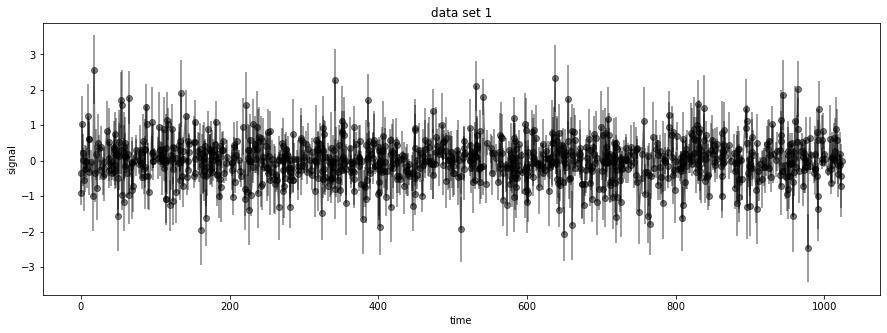

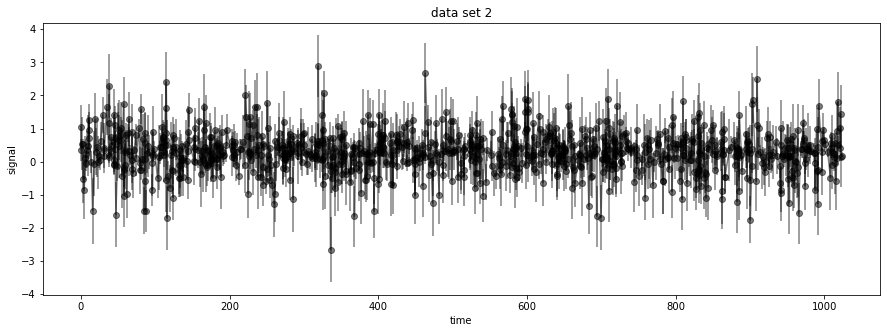

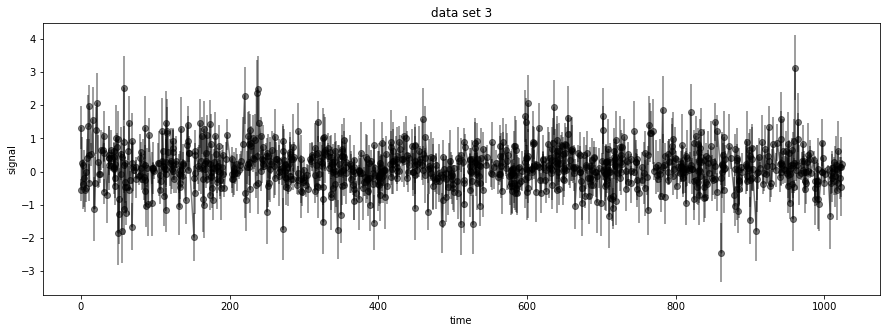

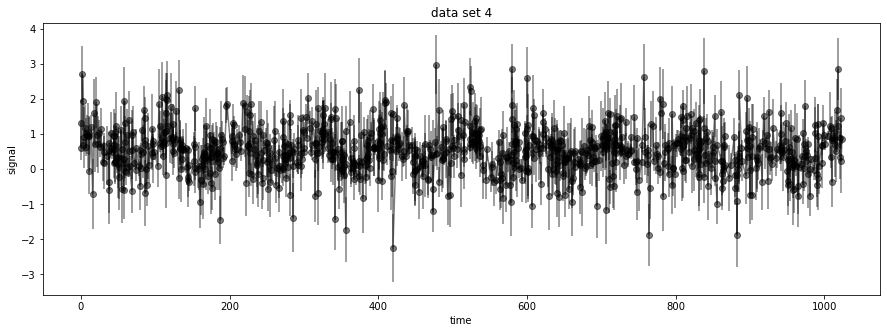

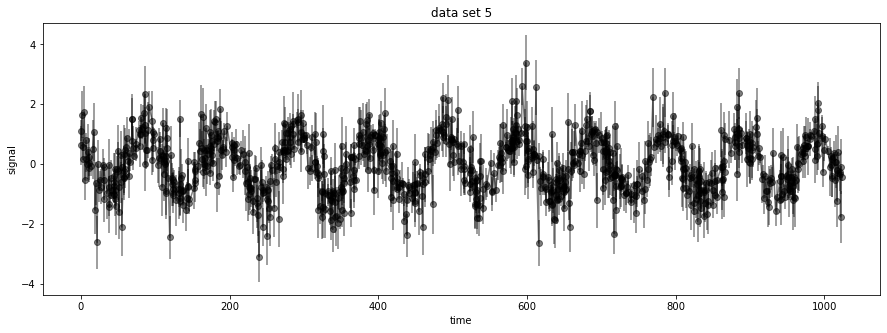

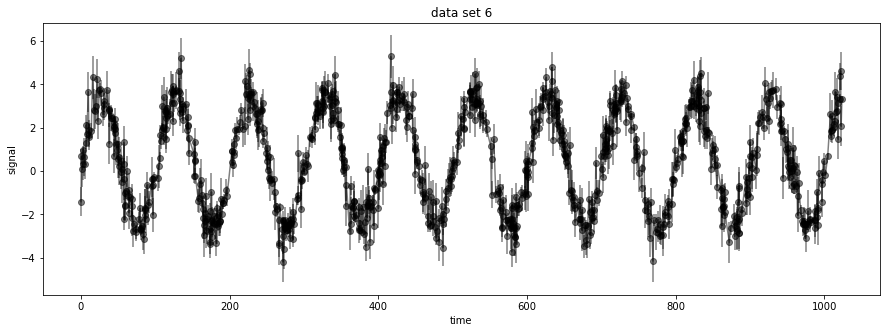

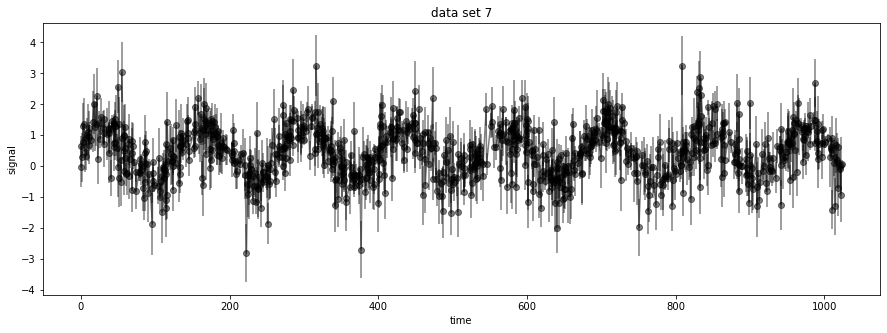

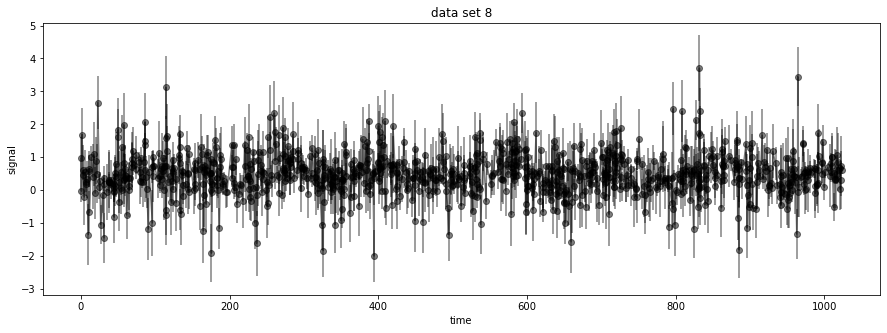

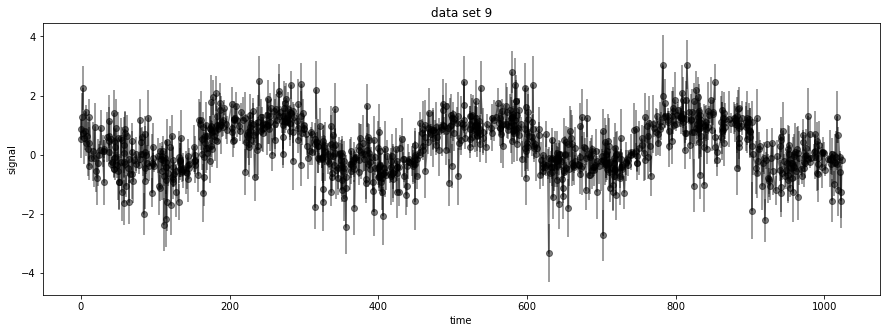

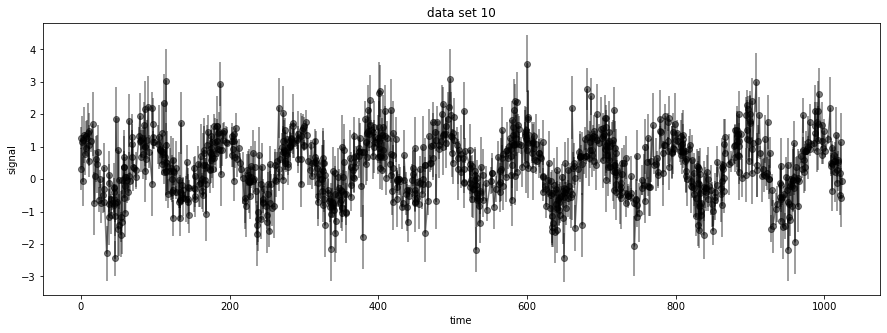

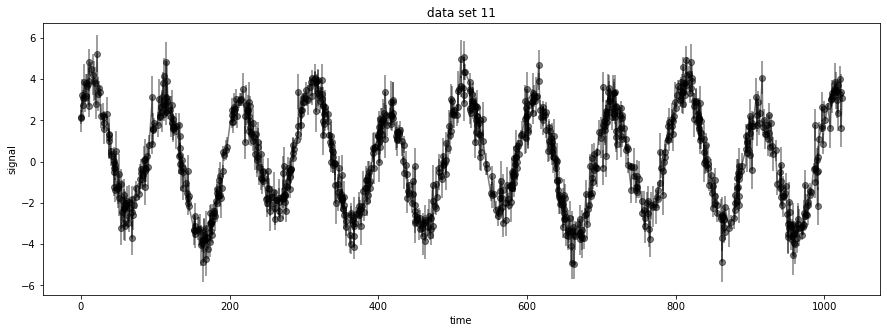

In [4]:
# - data[2:13] are data sets (m/s units, say?).
# There are 11 data sets in all; they are illustrated in this code block.
for i in range(2, 13):
    plt.figure(figsize=(15, 5))
    plt.errorbar(data[0], data[i], yerr=data[1],
                 color="k", marker="o", alpha=0.5)
    plt.xlabel("time")
    plt.ylabel("signal")
    plt.title("data set {}".format(i-1))

In [5]:
def guess2(T, T0, DC, A1, A2):
    parenthesis= 2*np.pi*(T/T0)
    return DC+(A1*np.sin(parenthesis))+(A2*np.cos(parenthesis))

guess_a1 = 1
guess_a2 = 1
guess_offset = 0
guess_freq = 100

params2= [guess_freq, guess_offset, guess_a1, guess_a2]

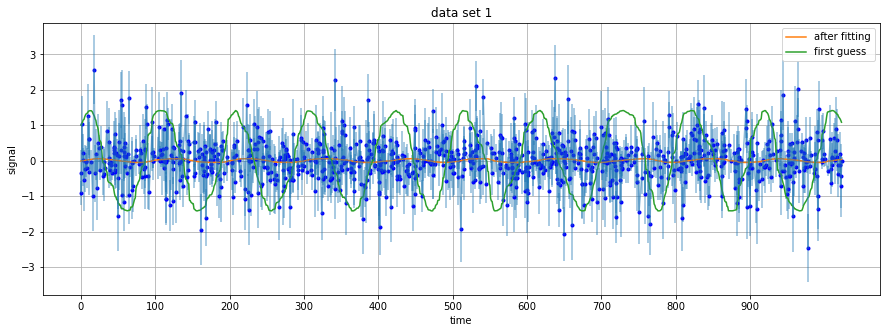

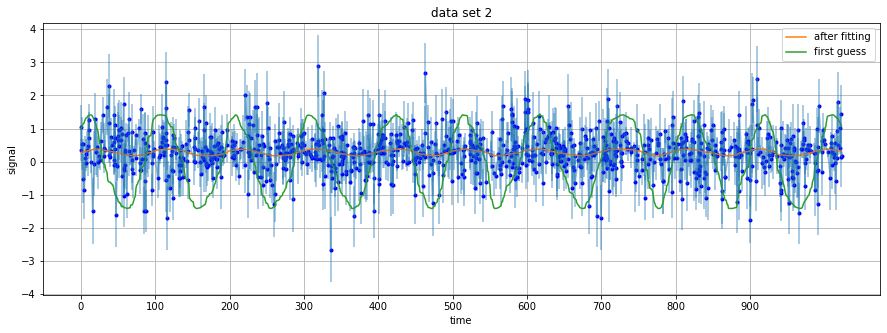

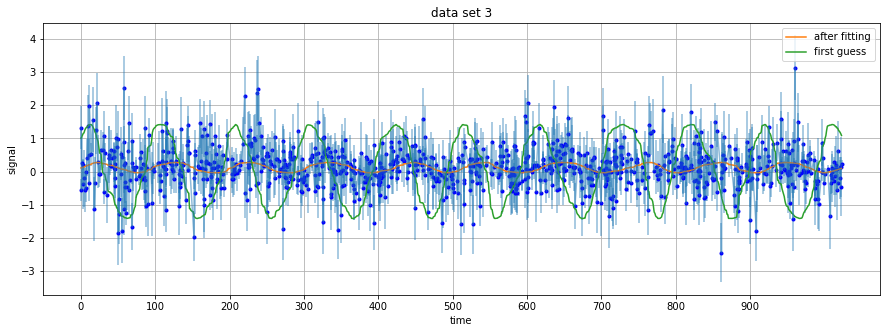

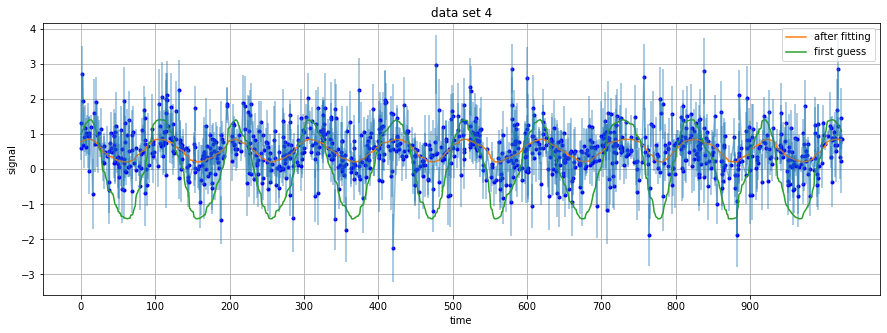

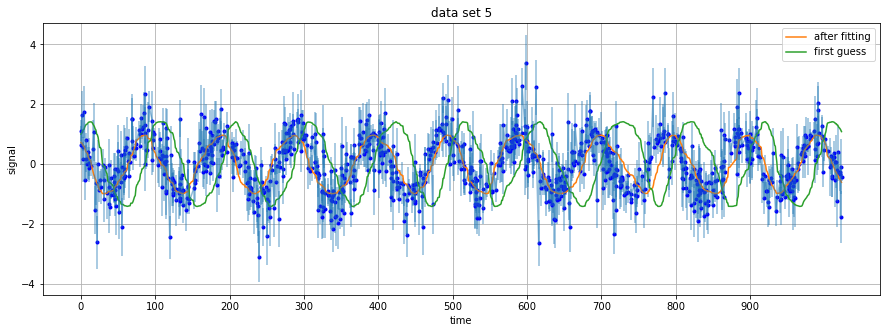

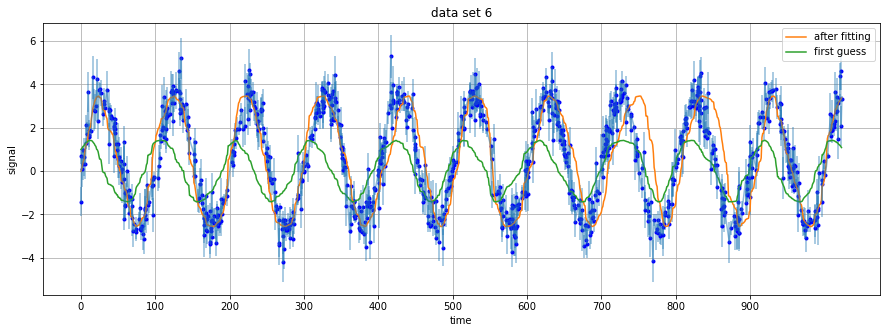

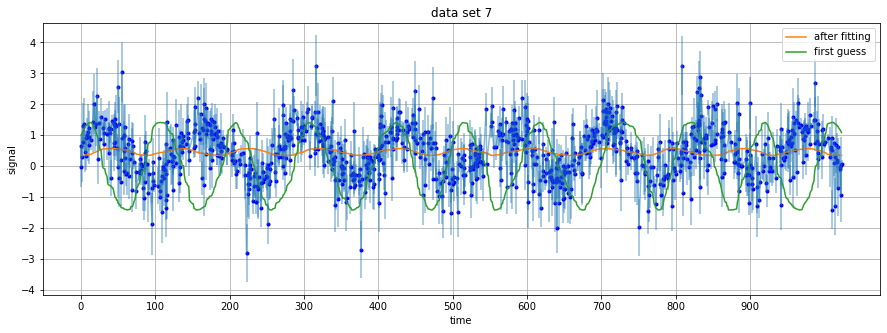

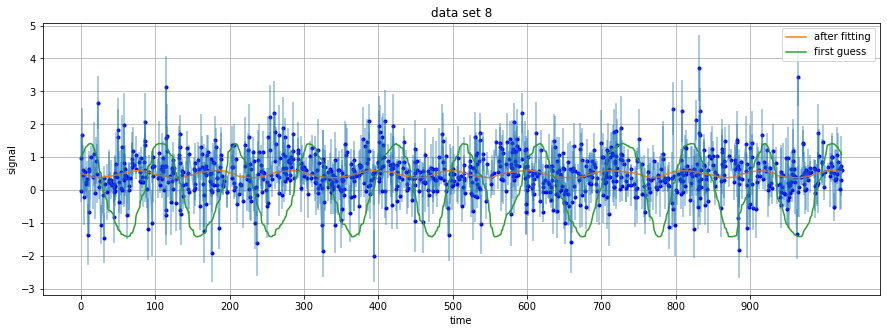

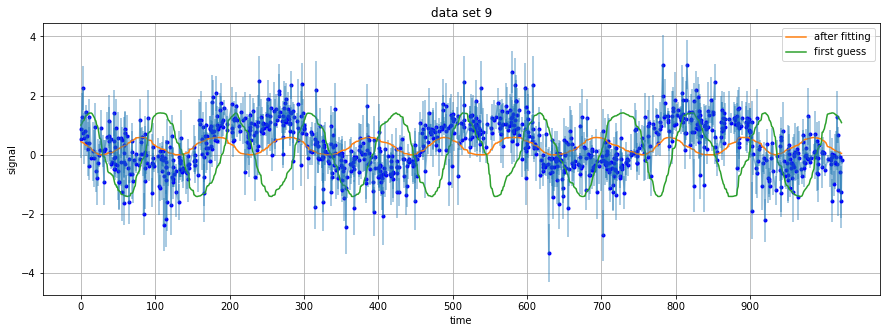

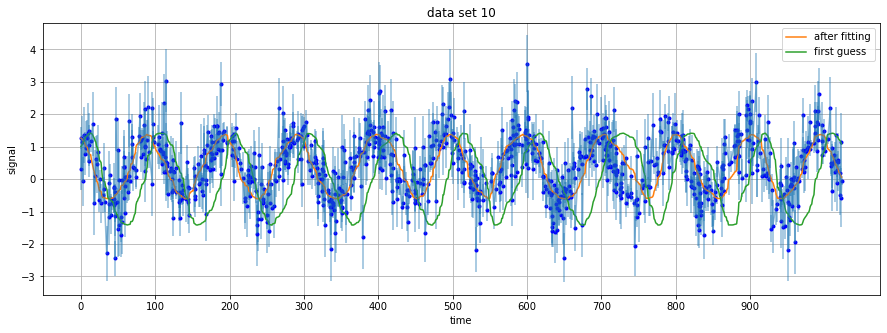

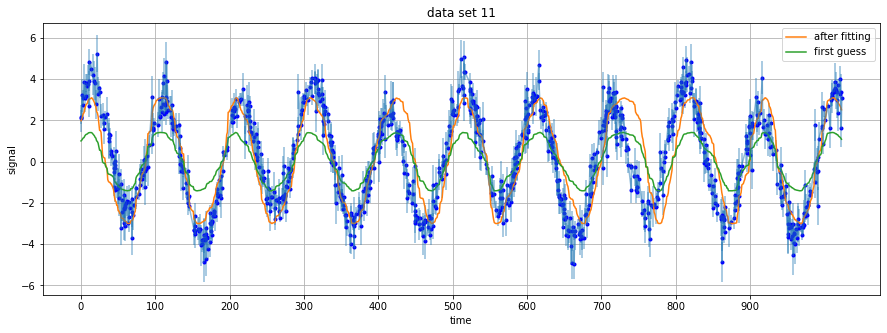

In [6]:
###optimize curve_fit

for i in range(2, 13):
    y=data[i]
    fit = optimize.curve_fit(guess2, t, y, p0=params2)
    y_first_guess= guess2(t, *params2)
    y_fit = guess2(t, *fit[0])
    plt.figure(figsize=(15, 5))
    plt.plot(t, y, '.', color='b')
    plt.errorbar(data[0], data[i], yerr=data[1], alpha=0.5)
    plt.plot(y_fit, label='after fitting')
    plt.plot(y_first_guess, label='first guess')
    plt.xticks(np.arange(0, 1000, 100))
    plt.grid()
    plt.legend()
    plt.xlabel("time")
    plt.ylabel("signal")
    plt.title("data set {}".format(i-1))
    

100 day period
data set 1
offset = 0.005081535792908673 amplitude 1 = -0.0009323546103449596 amplitude 2 = 0.008959335114322325
Final Amplitude = 0.009007717291864822
data set 2
offset = 0.28640313253341737 amplitude 1 = 0.04253461151956639 amplitude 2 = 0.026806873632478467
Final Amplitude = 0.05027724784699436
data set 3
offset = 0.09560586937543854 amplitude 1 = 0.08813394311807608 amplitude 2 = -0.08662208299883886
Final Amplitude = 0.12357579533467708
data set 4
offset = 0.5235855212345499 amplitude 1 = 0.24983257770211775 amplitude 2 = 0.1885324910579505
Final Amplitude = 0.31298692794716026
data set 5
offset = 0.007465131274773578 amplitude 1 = -0.618504370884164 amplitude 2 = 0.7622606006193604
Final Amplitude = 0.9816256313174608
data set 6
offset = 0.46009452104410514 amplitude 1 = 2.9716239893384104 amplitude 2 = -0.4600899814017779
Final Amplitude = 3.007030416373904
data set 7
offset = 0.49271224102216366 amplitude 1 = -0.037996364439153954 amplitude 2 = -0.038187816778195

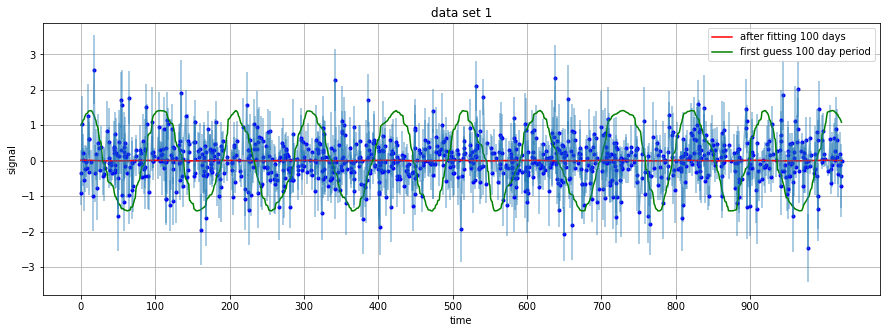

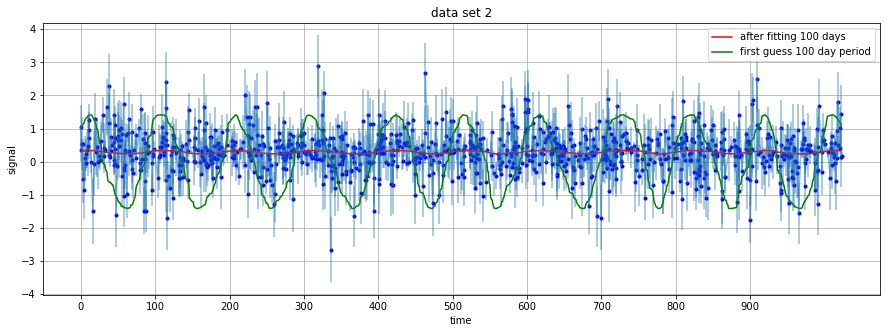

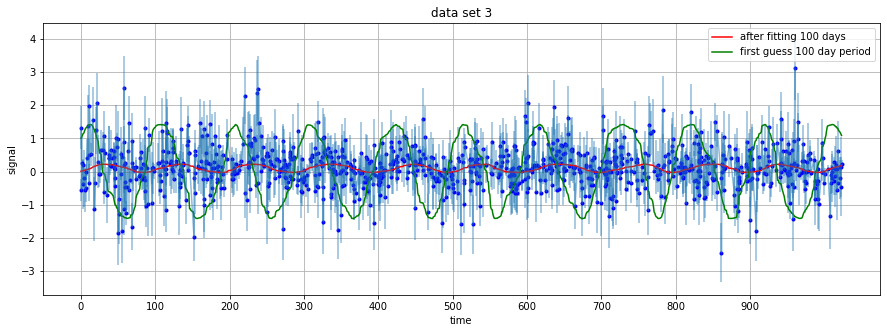

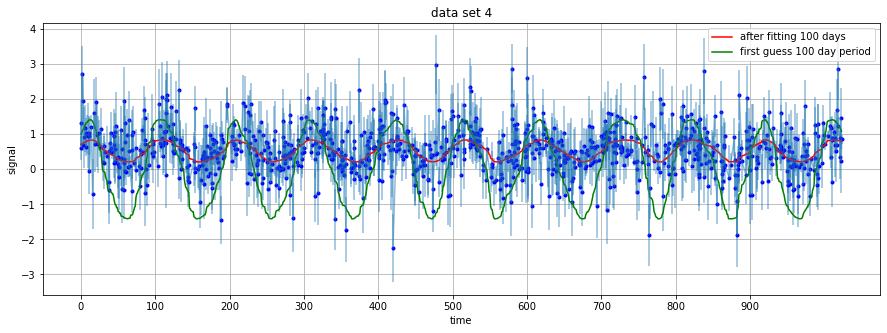

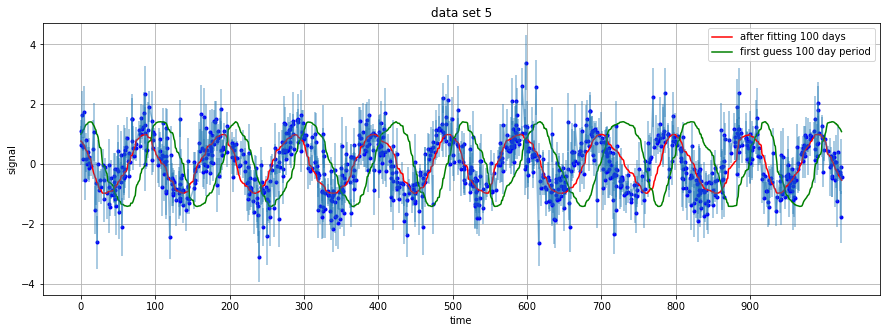

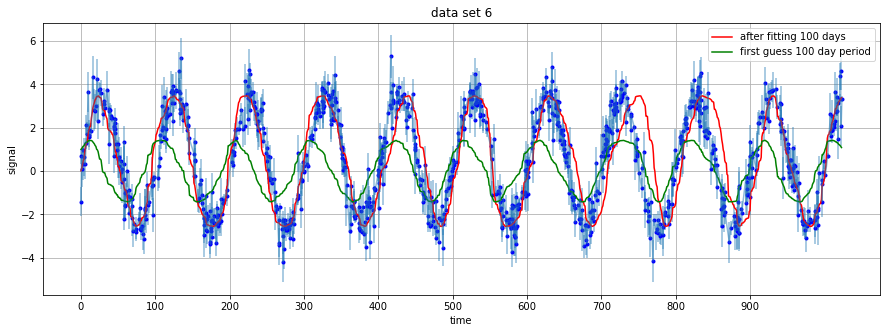

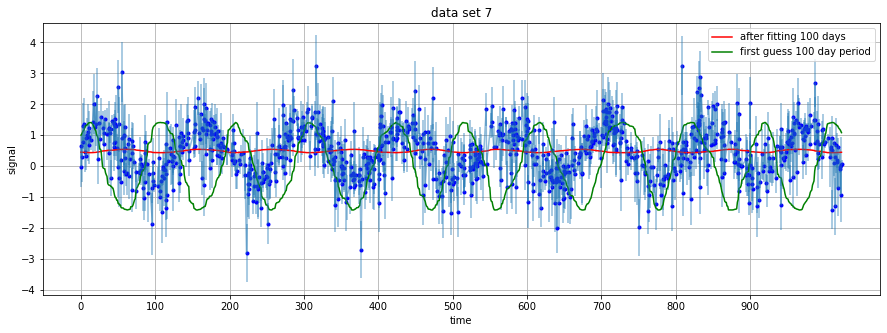

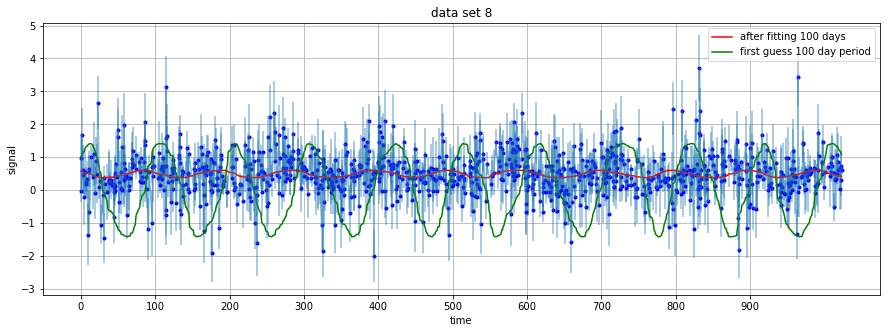

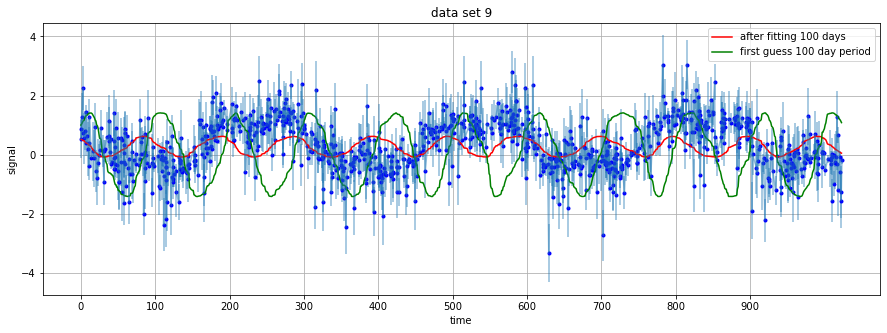

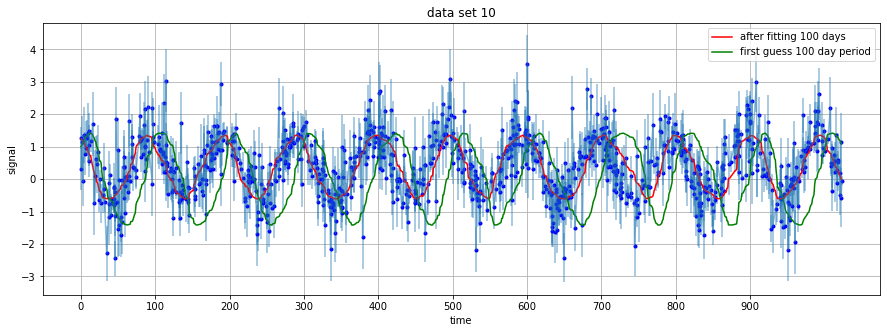

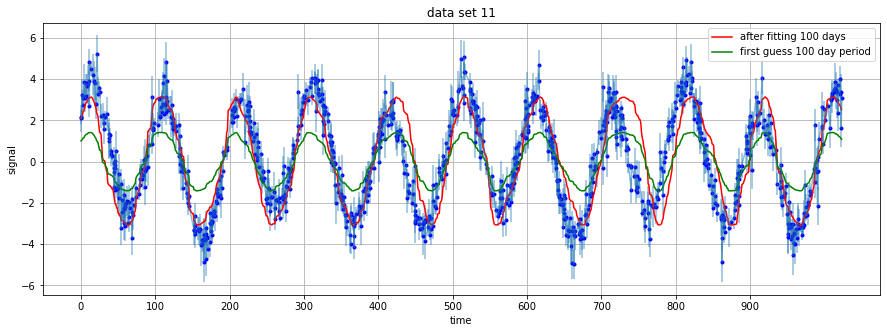

In [7]:
#fixed 100 day period

print("100 day period")

def guess100(T, DC, A1, A2):
    parenthesis= 2*np.pi*(T/100)
    return DC+(A1*np.sin(parenthesis))+(A2*np.cos(parenthesis))

params100= [guess_offset, guess_a1, guess_a2]

def negloglike100(params):
    for i in zip(y, t, sigma):
        return np.sum((y - (guess100(t, *params)))**2/(sigma**2))
    
#minimize negloglike with TWO amplitudes

for i in range(2, 13):
    y=data[i]
    lik_model100 = optimize.minimize(negloglike100, params100)
    y_first_guess100= guess100(t, *params100)
    #print(*lik_model100['x'][:])
    y_fit100 = guess100(t, *lik_model100['x'][:])
    print("data set {}".format(i-1))
    print("offset =", lik_model100['x'][0], "amplitude 1 =", lik_model100['x'][1], "amplitude 2 =", lik_model100['x'][2])
    print("Final Amplitude =", np.sqrt((lik_model100['x'][1])**2+((lik_model100['x'][2])**2)))
    
    #lik_model2 = optimize.minimize(negloglike2, params2)
    #y_first_guess2= guess2(t, *params2)
    #y_fit2 = guess2(t, *lik_model2['x'][:])
    #print("frequency", lik_model2['x'][0], "offset =", lik_model2['x'][1], "amplitude 1 =", lik_model2['x'][2], "amplitude 2 =", lik_model2['x'][3])
    
    
    plt.figure(figsize=(15, 5))
    plt.plot(t, y, '.', color='b')
    plt.errorbar(t, y, yerr=sigma, alpha=0.5)
    #plt.plot(y_fit2, 'm', label='after fitting double')
    plt.plot(y_fit100, 'r', label='after fitting 100 days')
    plt.plot(y_first_guess100, 'g', label='first guess 100 day period')
    plt.xticks(np.arange(0, 1000, 100))
    plt.grid()
    plt.legend()
    plt.xlabel("time")
    plt.ylabel("signal")
    plt.title("data set {}".format(i-1))

In [8]:
guess_b1 = 1
guess_b2 = 1
guess_offset = 0
guess_freq = 150

paramsextra= [guess_freq, guess_offset, guess_b1, guess_b2]

def guessextra(T, T0_B, DC, B1, B2):
    parenthesis= 2*np.pi*(T/T0_B)
    return DC+(B2*np.sin(parenthesis))+(B2*np.cos(parenthesis))

def negloglikeextra(params):
    for i in zip(y, t, sigma):
        return np.sum((y - (guessextra(t, *params)))**2/(sigma**2))

frequency = 50.077450305231956 offset = 0.392171230103682 amplitude 1 = 1.0 amplitude 2 = 0.21359434076019457
offset = 0.46009452104410514 amplitude 1 = 2.9716239893384104 amplitude 2 = -0.4600899814017779
frequency = 146.93279293452304 offset = 0.39081793150329625 amplitude 1 = 1.0 amplitude 2 = 0.22557887490239323


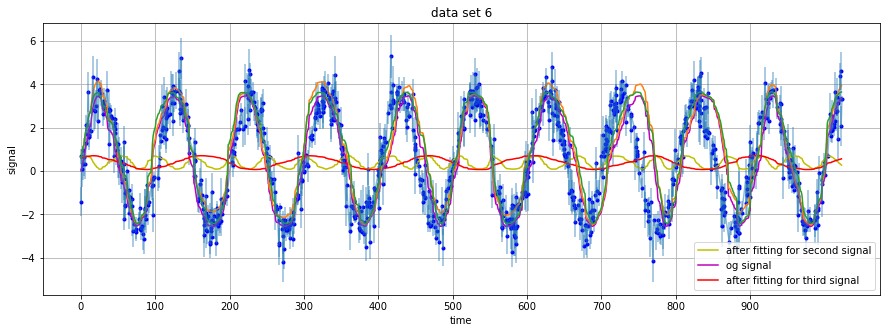

In [9]:
##### 6 #####
y=data[7]
params_new = [50,0, 1, 1]

model_ex = optimize.minimize(negloglikeextra, params_new)
y_first_guess_ex= guessextra(t, *params_new)
y_fit_ex50 = guessextra(t, *model_ex['x'][:])
print("frequency =", model_ex['x'][0], "offset =", model_ex['x'][1], "amplitude 1 =", model_ex['x'][2], "amplitude 2 =", model_ex['x'][3])

plt.figure(figsize=(15, 5))
plt.plot(t, y, '.', color='b')
plt.errorbar(t, y, yerr=sigma, alpha=0.5)
plt.plot(y_fit_ex50, 'y', label='after fitting for second signal')

lik_model100 = optimize.minimize(negloglike100, params100)
y_first_guess100= guess100(t, *params100)
y_fit100 = guess100(t, *lik_model100['x'][:])
print("offset =", lik_model100['x'][0], "amplitude 1 =", lik_model100['x'][1], "amplitude 2 =", lik_model100['x'][2])
plt.plot(y_fit100, 'm', label='og signal')


params_new = [150,0, 1, 1]

model_ex = optimize.minimize(negloglikeextra, params_new)
y_first_guess_ex= guessextra(t, *params_new)
y_fit_ex150 = guessextra(t, *model_ex['x'][:])
print("frequency =", model_ex['x'][0], "offset =", model_ex['x'][1], "amplitude 1 =", model_ex['x'][2], "amplitude 2 =", model_ex['x'][3])
plt.plot(y_fit_ex150, 'r', label='after fitting for third signal')

plt.xticks(np.arange(0, 1000, 100))
plt.grid()
plt.legend()
plt.xlabel("time")
plt.ylabel("signal")
plt.title("data set 6")

plt.plot(y_fit100+y_fit_ex150)
plt.plot(y_fit100+y_fit_ex50)

curve 2 for 7: frequency = 138.00025327260306 offset = 0.4336530987183654 amplitude 1 = 1.0 amplitude 2 = 0.5478804296224785
offset = 0.49271224102216366 amplitude 1 = -0.037996364439153954 amplitude 2 = -0.03818781677819538


Text(0.5, 1.0, 'data set 7')

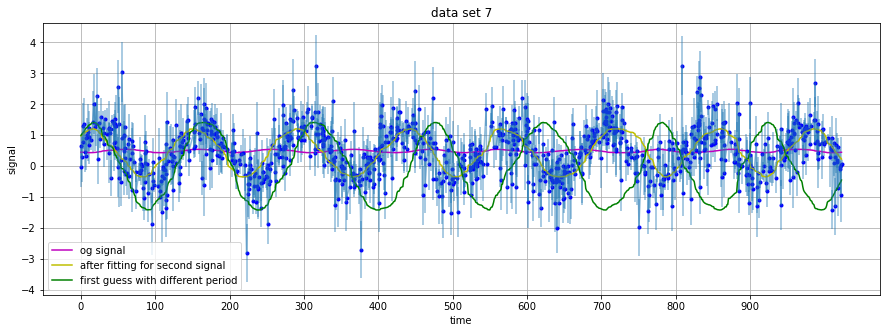

In [10]:
##### 7 #####

y=data[8]
params_new = [150,0, 1, 1]

model_ex777 = optimize.minimize(negloglikeextra, params_new)
y_first_guess_ex= guessextra(t, *params_new)
y_fit_ex = guessextra(t, *model_ex777['x'][:])
print("curve 2 for 7:", "frequency =", model_ex777['x'][0], "offset =", model_ex777['x'][1], "amplitude 1 =", model_ex777['x'][2], "amplitude 2 =", model_ex777['x'][3])


lik_model100 = optimize.minimize(negloglike100, params100)
y_first_guess100= guess100(t, *params100)
y_fit100 = guess100(t, *lik_model100['x'][:])
print("offset =", lik_model100['x'][0], "amplitude 1 =", lik_model100['x'][1], "amplitude 2 =", lik_model100['x'][2])

plt.figure(figsize=(15, 5))
plt.plot(y_fit100, 'm', label='og signal')
plt.plot(t, y, '.', color='b')
plt.errorbar(t, y, yerr=sigma, alpha=0.5)
plt.plot(y_fit_ex, 'y', label='after fitting for second signal')
#plt.plot(y_first_guess100, 'c', label='first guess with 100 day period')
plt.plot(y_first_guess_ex, 'g', label='first guess with different period')
plt.xticks(np.arange(0, 1000, 100))
plt.grid()
plt.legend()
plt.xlabel("time")
plt.ylabel("signal")
plt.title("data set 7")

50 frequency = 49.50770458683605 offset = 0.4941154952515177 amplitude 1 = 1.0 amplitude 2 = -0.03492275521410034
150 frequency = 154.761811014293 offset = 0.4916299155994147 amplitude 1 = 1.0 amplitude 2 = -0.1330995734603772
offset = 0.4908278759113082 amplitude 1 = -0.08244428386725351 amplitude 2 = 0.07607086970840765


Text(0.5, 1.0, 'data set 8')

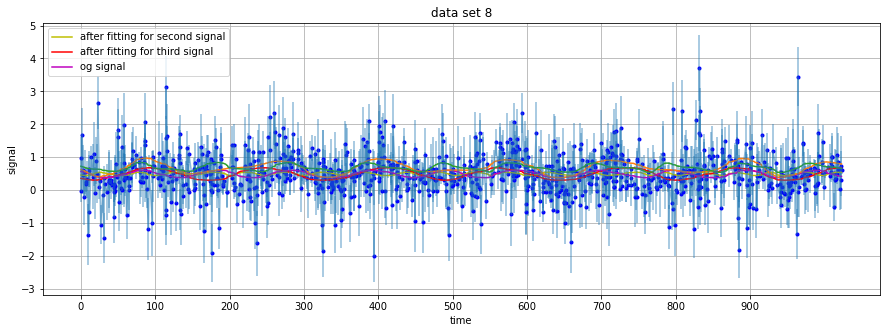

In [11]:
##### 8 #####
y=data[9]
params_new = [50,1, 1, 1]

model_ex = optimize.minimize(negloglikeextra, params_new)
y_first_guess_ex50= guessextra(t, *params_new)
y_fit_ex50 = guessextra(t, *model_ex['x'][:])
print("50", "frequency =", model_ex['x'][0], "offset =", model_ex['x'][1], "amplitude 1 =", model_ex['x'][2], "amplitude 2 =", model_ex['x'][3])

plt.figure(figsize=(15, 5))
plt.plot(t, y, '.', color='b')
plt.errorbar(t, y, yerr=sigma, alpha=0.5)
plt.plot(y_fit_ex50, 'y', label='after fitting for second signal')
#plt.plot(y_first_guess100, 'c', label='first guess with 100 day period')
#plt.plot(y_first_guess_ex, 'g', label='first guess with different period')

params_new = [150,0, 1, 1]
model_ex = optimize.minimize(negloglikeextra, params_new)
y_first_guess_ex150= guessextra(t, *params_new)
y_fit_ex150 = guessextra(t, *model_ex['x'][:])
print("150", "frequency =", model_ex['x'][0], "offset =", model_ex['x'][1], "amplitude 1 =", model_ex['x'][2], "amplitude 2 =", model_ex['x'][3])
plt.plot(y_fit_ex150, 'r', label='after fitting for third signal')

model888=model_ex

lik_model100 = optimize.minimize(negloglike100, params100)
y_first_guess100= guess100(t, *params100)
y_fit100 = guess100(t, *lik_model100['x'][:])
print("offset =", lik_model100['x'][0], "amplitude 1 =", lik_model100['x'][1], "amplitude 2 =", lik_model100['x'][2])
plt.plot(y_fit100, 'm', label='og signal')

plt.plot(y_fit100+y_fit_ex150-.3)
plt.plot(y_fit100+y_fit_ex50-.3)

plt.xticks(np.arange(0, 1000, 100))
plt.grid()
plt.legend()
plt.xlabel("time")
plt.ylabel("signal")
plt.title("data set 8")


250 frequency = 260.95069113750543 offset = 0.3287785757156338 amplitude 1 = 1.0 amplitude 2 = 0.8399579894115
offset = 0.27217891257188503 amplitude 1 = -0.24356206473102407 amplitude 2 = 0.24901591223851155
300 frequency = 324.8819331626082 offset = 0.36568777916975537 amplitude 1 = 1.0 amplitude 2 = 0.8399579894115


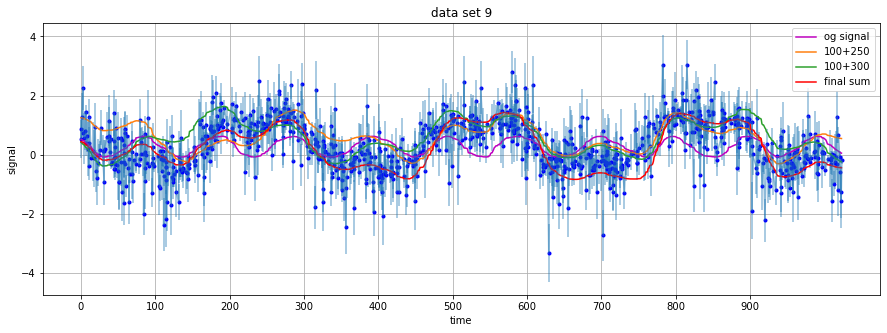

In [23]:
##### 9 #####
y=data[10]
params_new = [250,0, 1, 1]

model_ex_9_250 = optimize.minimize(negloglikeextra, params_new)
y_first_guess_ex= guessextra(t, *params_new)
y_fit_ex250 = guessextra(t, *model_ex_9_250['x'][:])
print("250", "frequency =", model_ex_9_250['x'][0], "offset =", model_ex_9_250['x'][1], "amplitude 1 =", model_ex_9_250['x'][2], "amplitude 2 =", model_ex['x'][3])

plt.figure(figsize=(15, 5))
plt.plot(t, y, '.', color='b')
plt.errorbar(t, y, yerr=sigma, alpha=0.5)
#plt.plot(y_fit_ex250, 'y', label='after fitting for second signal')

lik_model100 = optimize.minimize(negloglike100, params100)
y_first_guess100= guess100(t, *params100)
y_fit100 = guess100(t, *lik_model100['x'][:])
print("offset =", lik_model100['x'][0], "amplitude 1 =", lik_model100['x'][1], "amplitude 2 =", lik_model100['x'][2])
plt.plot(y_fit100, 'm', label='og signal')


params_new = [300,0, 1, 1]

model_ex9_300 = optimize.minimize(negloglikeextra, params_new)
y_first_guess_ex= guessextra(t, *params_new)
y_fit_ex300 = guessextra(t, *model_ex9_300['x'][:])
print("300","frequency =", model_ex9_300['x'][0], "offset =", model_ex9_300['x'][1], "amplitude 1 =", model_ex9_300['x'][2], "amplitude 2 =", model_ex['x'][3])
#plt.plot(y_fit_ex300, 'r', label='after fitting for third signal')

plt.xticks(np.arange(0, 1000, 100))
plt.grid()
plt.xlabel("time")
plt.ylabel("signal")
plt.title("data set 9")

plt.plot(y_fit100+y_fit_ex250, label='100+250')

plt.plot(y_fit100+y_fit_ex300,  label='100+300')
plt.plot(y_fit100+y_fit_ex300+y_fit_ex250 - (0.3287785757156338+0.36568777916975537), 'r', label="final sum")

plt.legend()

curve 2 for number 11 frequency = 253.44135441822303 offset = 0.14505709848097884 amplitude 1 = 1.0 amplitude 2 = 0.8399579894115
offset = 0.03377262711669915 amplitude 1 = 2.314051404725436 amplitude 2 = 2.0609544239058177
frequency = 154.82838036739784 offset = 0.12003772387776848 amplitude 1 = 1.0 amplitude 2 = -0.2897763661222542


Text(0.5, 1.0, 'data set 11')

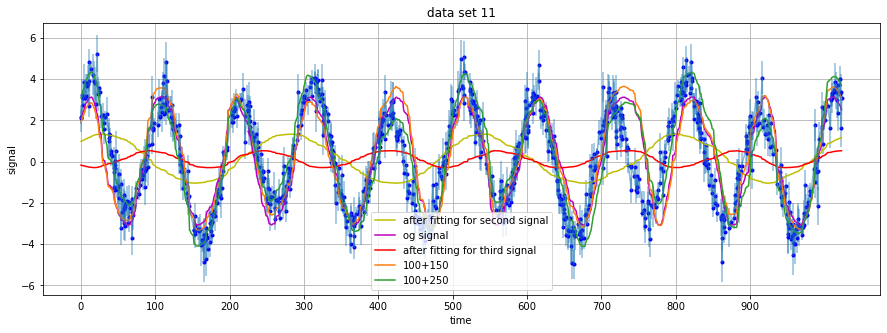

In [13]:
##### 11 #####
y=data[12]
params_new = [250,0, 1, 1]

model_ex1111 = optimize.minimize(negloglikeextra, params_new)
y_first_guess_ex= guessextra(t, *params_new)
y_fit_ex250 = guessextra(t, *model_ex1111['x'][:])
print("curve 2 for number 11", "frequency =", model_ex1111['x'][0], "offset =", model_ex1111['x'][1], "amplitude 1 =", model_ex1111['x'][2], "amplitude 2 =", model_ex1111['x'][3])

plt.figure(figsize=(15, 5))
plt.plot(t, y, '.', color='b')
plt.errorbar(t, y, yerr=sigma, alpha=0.5)
plt.plot(y_fit_ex250, 'y', label='after fitting for second signal')

lik_model100 = optimize.minimize(negloglike100, params100)
y_first_guess100= guess100(t, *params100)
y_fit100 = guess100(t, *lik_model100['x'][:])
print("offset =", lik_model100['x'][0], "amplitude 1 =", lik_model100['x'][1], "amplitude 2 =", lik_model100['x'][2])
plt.plot(y_fit100, 'm', label='og signal')


params_new = [150,0, 1, 1]

model_ex = optimize.minimize(negloglikeextra, params_new)
y_first_guess_ex= guessextra(t, *params_new)
y_fit_ex150 = guessextra(t, *model_ex['x'][:])
print("frequency =", model_ex['x'][0], "offset =", model_ex['x'][1], "amplitude 1 =", model_ex['x'][2], "amplitude 2 =", model_ex['x'][3])
plt.plot(y_fit_ex150, 'r', label='after fitting for third signal')

plt.xticks(np.arange(0, 1000, 100))
plt.grid()

plt.plot(y_fit100+y_fit_ex150, label="100+150")
plt.plot(y_fit100+y_fit_ex250, label = '100+250')

plt.legend()
plt.xlabel("time")
plt.ylabel("signal")
plt.title("data set 11")


In [14]:
print("curve 2 for 7:", "frequency =", model_ex777['x'][0], "offset =", model_ex777['x'][1], "amplitude 1 =", model_ex777['x'][2], "amplitude 2 =", model_ex777['x'][3])
print("curve 2 for number 11", "frequency =", model_ex1111['x'][0], "offset =", model_ex1111['x'][1], "amplitude 1 =", model_ex1111['x'][2], "amplitude 2 =", model_ex1111['x'][3])

curve 2 for 7: frequency = 138.00025327260306 offset = 0.4336530987183654 amplitude 1 = 1.0 amplitude 2 = 0.5478804296224785
curve 2 for number 11 frequency = 253.44135441822303 offset = 0.14505709848097884 amplitude 1 = 1.0 amplitude 2 = 0.8399579894115


Part 3: setting the second signal as a nuisance parameter and doing another curve fit

so, how I approached this is to make a new function, one that accepted the second signal curve as noise. I did this by modelling off the equation y= DC + A1*sin(2pi*(t/100)) + A2*cos(2pi*(t/100)) + noise

where noise = DC2 + Bcos(2pi*(t/T0), these variables being set by the curve fitting we already did

In [15]:
def guess(T, DC, A1, A2):
    return (DC+(A1*np.sin(2*np.pi*(T/100)))+(A2*np.cos(2*np.pi*(T/100)))) + (model_ex['x'][1] + model_ex['x'][3]*np.cos(2*np.pi*(T/model_ex['x'][0])))

def negloglike(params):
    for i in zip(y, t, sigma):
        return np.sum((y - (guess(t, *params)))**2/(sigma**2))

offset = 0.04498765131907099 amplitude 1 = 0.007511846738375677 amplitude 2 = -0.034063534449745574
Final Amplitude = 0.034881975583814756


Text(0.5, 1.0, 'data set 7 ')

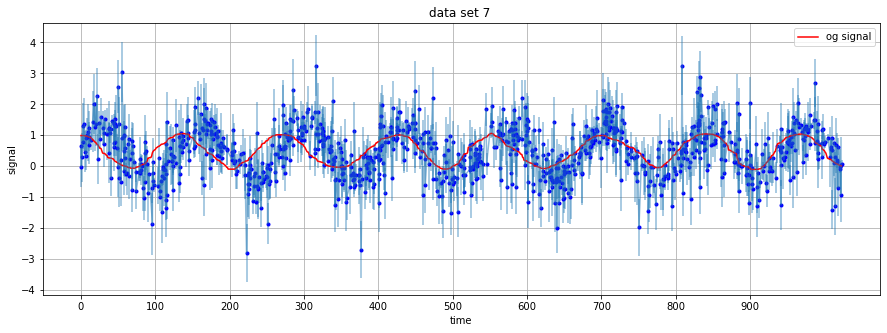

In [16]:
y=data[8]
params = [0, 1, 1]
model_ex = model_ex777
    
lik_model = optimize.minimize(negloglike, params)
y_fit = guess(t, *lik_model['x'][:])
print("offset =", lik_model['x'][0], "amplitude 1 =", lik_model['x'][1], "amplitude 2 =", lik_model['x'][2])
print("Final Amplitude =", np.sqrt((lik_model['x'][1])**2+((lik_model['x'][2])**2)))
plt.figure(figsize=(15, 5))
plt.plot(t, y, '.', color='b')
plt.errorbar(t, y, yerr=sigma, alpha=0.5)
plt.plot(y_fit, 'r', label='og signal')
plt.xticks(np.arange(0, 1000, 100))
plt.grid()
plt.legend()
plt.xlabel("time")
plt.ylabel("signal")
plt.title("data set 7 ")

offset = -0.008695110510209854 amplitude 1 = -0.08040479823074231 amplitude 2 = 0.05602504554421503
Final Amplitude = 0.0979986597191908


Text(0.5, 1.0, 'data set 8')

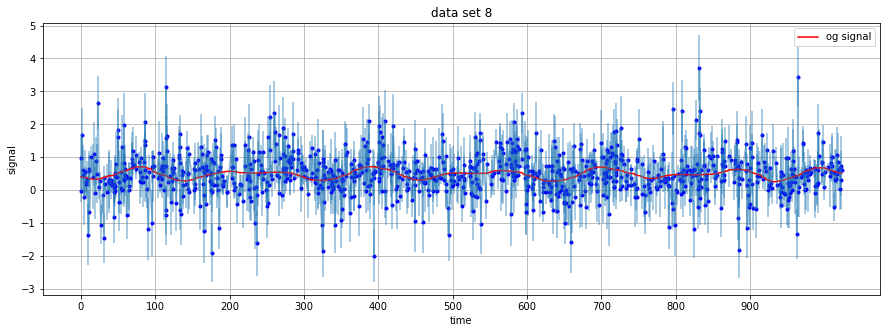

In [17]:
y=data[9]
params = [0, 1, 1]
model_ex = model888
    
lik_model = optimize.minimize(negloglike, params)
y_fit = guess(t, *lik_model['x'][:])
print("offset =", lik_model['x'][0], "amplitude 1 =", lik_model['x'][1], "amplitude 2 =", lik_model['x'][2])
print("Final Amplitude =", np.sqrt((lik_model['x'][1])**2+((lik_model['x'][2])**2)))
plt.figure(figsize=(15, 5))
plt.plot(t, y, '.', color='b')
plt.errorbar(t, y, yerr=sigma, alpha=0.5)
plt.plot(y_fit, 'r', label='og signal')
plt.xticks(np.arange(0, 1000, 100))
plt.grid()
plt.legend()
plt.xlabel("time")
plt.ylabel("signal")
plt.title("data set 8")


offset = -0.368253538658842 amplitude 1 = -0.3216345428769975 amplitude 2 = 0.18167029952165084
Final Amplitude = 0.3693952854328023


Text(0.5, 1.0, 'data set 9')

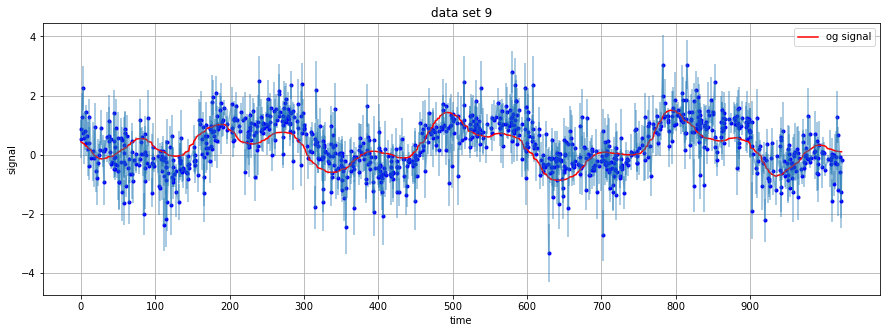

In [18]:
y=data[10]
params = [0, 1, 1]

model300 = model_ex9_300
model250 = model_ex9_250

def guess(T, DC, A1, A2):
    return (DC+(A1*np.sin(2*np.pi*(T/100)))+(A2*np.cos(2*np.pi*(T/100)))) + (model250['x'][1] + model300['x'][3]*np.cos(2*np.pi*(T/model300['x'][0]))) + (model300['x'][1] + model250['x'][3]*np.cos(2*np.pi*(T/model250['x'][0])))

def negloglike(params):
    for i in zip(y, t, sigma):
        return np.sum((y - (guess(t, *params)))**2/(sigma**2))
    
    
lik_model = optimize.minimize(negloglike, params)
y_fit = guess(t, *lik_model['x'][:])
print("offset =", lik_model['x'][0], "amplitude 1 =", lik_model['x'][1], "amplitude 2 =", lik_model['x'][2])
print("Final Amplitude =", np.sqrt((lik_model['x'][1])**2+((lik_model['x'][2])**2)))
plt.figure(figsize=(15, 5))
plt.plot(t, y, '.', color='b')
plt.errorbar(t, y, yerr=sigma, alpha=0.5)
plt.plot(y_fit, 'r', label='og signal')
plt.xticks(np.arange(0, 1000, 100))
plt.grid()
plt.legend()
plt.xlabel("time")
plt.ylabel("signal")
plt.title("data set 9")


offset = -0.13508590680355995 amplitude 1 = 2.2258688343609214 amplitude 2 = 1.9546812303085868
Final Amplitude = 2.9623083532778853


Text(0.5, 1.0, 'data set 11')

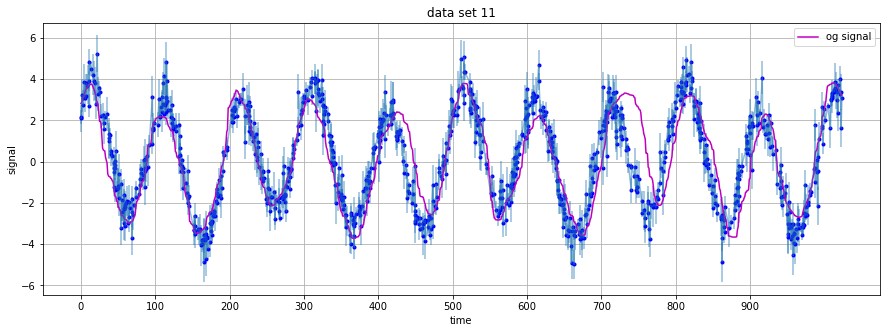

In [19]:
y=data[12]
params = [0, 1, 1]
model_ex = model_ex1111

def guess(T, DC, A1, A2):
    return (DC+(A1*np.sin(2*np.pi*(T/100)))+(A2*np.cos(2*np.pi*(T/100)))) + (model_ex['x'][1] + model_ex['x'][3]*np.cos(2*np.pi*(T/model_ex['x'][0])))

def negloglike(params):
    for i in zip(y, t, sigma):
        return np.sum((y - (guess(t, *params)))**2/(sigma**2))
    
lik_model = optimize.minimize(negloglike, params)
y_fit = guess(t, *lik_model['x'][:])
print("offset =", lik_model['x'][0], "amplitude 1 =", lik_model['x'][1], "amplitude 2 =", lik_model['x'][2])
print("Final Amplitude =", np.sqrt((lik_model['x'][1])**2+((lik_model['x'][2])**2)))
plt.figure(figsize=(15, 5))
plt.plot(t, y, '.', color='b')
plt.errorbar(t, y, yerr=sigma, alpha=0.5)
plt.plot(y_fit, 'm', label='og signal')
plt.xticks(np.arange(0, 1000, 100))
plt.grid()
plt.legend()
plt.xlabel("time")
plt.ylabel("signal")
plt.title("data set 11")

In [20]:
import random
# Bootstrap standard uncertainty variance 

def guessBoot(T, DC, A1, A2):
    parenthesis= 2*np.pi*(T/100)
    return DC+(A1*np.sin(parenthesis))+(A2*np.cos(parenthesis))

params100= [guess_offset, guess_a1, guess_a2]

def negloglikeBoot(params):
    for i in zip(yVals, tVals, sigVals):
        return np.sum((yVals - (guess100(tVals, *params)))**2/(sigVals**2))

    
for i in range(2, 13):
    y=data[i]
    bsAmp = np.zeros(100)
    for k in range(100):
        tVals=np.zeros(1024)
        yVals = np.zeros(1024)
        sigVals = np.zeros(1024)
        for j in range(1024):
            index = random.randint(0,1023)
            tVals[j] = data[0][index]
            yVals[j] = data[i][index]           ###########
            sigVals[j] = data[1][index]
        lik_model = optimize.minimize(negloglikeBoot, params100)
        amp = np.sqrt((lik_model['x'][1])**2+((lik_model['x'][2])**2))
        bsAmp[k] +=amp
    lik_model100 = optimize.minimize(negloglike100, params100)
    #y_first_guess100= guess100(t, *params100)
    y_fit100 = guess100(t, *lik_model100['x'][:])
    amplitude= (np.sqrt((lik_model100['x'][1])**2+((lik_model100['x'][2])**2)))
    print("data set {}".format(i-1))
    print("Amplitude",amplitude)
    #print(bsAmp)
    bootstrap = np.sum(np.sqrt((bsAmp-amplitude)**2)/100)
    bootmean= np.mean(bsAmp)
    #bootstrap = ((bootmean-amplitude)**2)/100
    bootstd = np.std(bsAmp-amplitude)
    print("bootstrap mean amplitude", bootmean)
    print("bootstrap standard devation", bootstd)

data set 1
Amplitude 0.009007717291864822
bootstrap mean amplitude 0.018728653776740697
bootstrap standard devation 0.008525524129042138
data set 2
Amplitude 0.05027724784699436
bootstrap mean amplitude 0.05314859317166735
bootstrap standard devation 0.013337499609627502
data set 3
Amplitude 0.12357579533467708
bootstrap mean amplitude 0.12360852432957475
bootstrap standard devation 0.013953325938062979
data set 4
Amplitude 0.31298692794716026
bootstrap mean amplitude 0.3140643997700673
bootstrap standard devation 0.014386425825843444
data set 5
Amplitude 0.9816256313174608
bootstrap mean amplitude 0.9813240671263975
bootstrap standard devation 0.01177915345883871
data set 6
Amplitude 3.007030416373904
bootstrap mean amplitude 3.008191508666863
bootstrap standard devation 0.013013663728152141
data set 7
Amplitude 0.05387052126050038
bootstrap mean amplitude 0.08032150010198708
bootstrap standard devation 0.03752132852564864


C:\Users\jessm\anaconda3\lib\site-packages\scipy\optimize\optimize.py:1166: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (np.dot(yk, sk))


data set 8
Amplitude 0.11217770349128124
bootstrap mean amplitude 0.1116884915114376
bootstrap standard devation 0.018603171743407393
data set 9
Amplitude 0.34832657653991556
bootstrap mean amplitude 0.3531555191493013
bootstrap standard devation 0.04946407090711794
data set 10
Amplitude 0.9781258002196528
bootstrap mean amplitude 0.9744377119287081
bootstrap standard devation 0.01491156755758288


C:\Users\jessm\anaconda3\lib\site-packages\scipy\optimize\optimize.py:1166: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (np.dot(yk, sk))


data set 11
Amplitude 3.0987686330426034
bootstrap mean amplitude 3.10944031464479
bootstrap standard devation 0.05027659195188176
